<pre>
Needs to be using python 2 kernal

python2 -m pip install ipykernel

python2 -m ipykernel install --usern

I added this to my .bashrc file

export SPARK_HOME=/home/andrew/Downloads/spark-2.1.0-bin-hadoop2.7
export PATH = $Spark_HOME/bin:$PATH


export PYTHONPATH=$SPARK_HOME/python/$PYTHONPATH
export PYTHONPATH=$SPARK_HOME/python/lib/py4j-0.10.4-src.zip$PYTHONPATH

Then finally

pip2 install findspark
</pre>

In [1]:
import findspark
findspark.init()
import pyspark
spark = pyspark.sql.SparkSession \
    .builder \
    .appName("Read Some Parquet") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:

df = spark.read.parquet("/home/andrew/Documents/CAMCOS/Verizon/Verizon data/agg/oneday/feature/day=2016-11-25")
df.show()

+----------------+------------+-----------+-------+
|    subscriberid|featureValue|featureType|measure|
+----------------+------------+-----------+-------+
|3220237051000000|        dpcz|          4|    1.0|
|2294189755000000|       djud1|          4|    1.0|
|8102531227000000|       66413|          3|    1.0|
|5720868074000000|       57730|          3|    1.0|
|7931520141000000|       65746|          3|    1.0|
|4388889546000000|       dr77q|          4|    1.0|
|3684046523000000|       91750|          3|    1.0|
|8702309588000000|       80524|          3|    1.0|
|3506846389000000|       99502|          3|    1.0|
|6506852123000000|     9q5f36v|          4|    1.0|
|2777595771000000|       56320|          3|    1.0|
|5882619442000000|       dpq8r|          4|    1.0|
|3737765807000000|       99026|          3|    1.0|
|3754656122000000|       43964|          3|    1.0|
|2790677778000000|        9r94|          4|    1.0|
|7887428116000000|       70446|          3|    1.0|
|55395489980

In [3]:
df.createOrReplaceTempView("table1")
df2 = spark.sql("SELECT DISTINCT subscriberid from table1") 
print("There are ",df2.count(), "unique subscriberids and ", df.count(), " rows the original")

('There are ', 92527, 'unique subscriberids and ', 219873, ' rows the original')


In [4]:
df2 = spark.sql("SELECT DISTINCT featureValue from table1") 
print("There are ",df2.count(), "unique featureValues")

('There are ', 52652, 'unique featureValues')


<pre>
Now let's look at our hist table
</pre>

In [5]:
hist = spark.read.parquet("/home/andrew/Documents/CAMCOS/Verizon/Verizon data/agg/agg/hist/date=20170202")
hist.show()

+----------------+-------+--------------+----------+-----------+--------------------+--------------------+------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+---------------+--------------------+--------------------+-------+--------------------+-------+-------------------+---------------------+-----------------+------+---------+---------+---------+-------------------+-------+---------+-----------------+----------+-----------+--------------+----------+----------------+----------+-------------------+---------------+----------------+-------------------+-----------------+---------------+--------------------------+------------------------+-----------------------------+------------------+-----------------------------+-------------------+------------------------------+--------------------------+--------------------+----------+------------------+---------+-

In [6]:
# Really ugly but what is the shape of hist
print('There are ',hist.count(),' rows in hist and ',len(hist.schema), ' columns')
print('The columns are \n')
hist.printSchema()

('There are ', 999937, ' rows in hist and ', 73, ' columns')
The columns are 

root
 |-- subscriberid: string (nullable = true)
 |-- privacy: string (nullable = true)
 |-- osSet: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- vzCategMap: map (nullable = true)
 |    |-- key: string
 |    |-- value: array (valueContainsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- appCategMap: map (nullable = true)
 |    |-- key: string
 |    |-- value: array (valueContainsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- dmaMap: map (nullable = true)
 |    |-- key: string
 |    |-- value: array (valueContainsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- stateMap: map (nullable = true)
 |    |-- key: string
 |    |-- value: array (valueContainsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- vzcategories: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ap

In [13]:
hist.createOrReplaceTempView("table1")
df2 = spark.sql("SELECT tld from table1") 
df2 = df2.na.drop(subset=["tld"])

#hist_tld = df2.rdd
#print(hist_tld.map(lambda x:(x[1]))).\
 #   reduce(lambda x:type(x))
#import matplotlib.pyplot as plt


In [17]:
df2.toPandas().to_csv("/home/andrew/websites.csv")

In [19]:
import pandas as pd
pd.read_csv("/home/andrew/websites.csv")

,Unnamed: 0,tld
0,0,[u'glenbrookdodgechryslerjeep.com']
1,1,"[u'usmilitarymuseum.org', u'baldtruthtalk.com'..."
2,2,[u'lindasecrist.com']
3,3,[u'bcferries.com']
4,4,[u'golfcollege.edu']
5,5,"[u'cccti.edu', u'elcoyotecafe.com']"
6,6,"[u'bryancountyga.org', u'propertyresourcesgrou..."
7,7,"[u'kfc.com.cn', u'smscsoccer.com', u'texaspepp..."
8,8,"[u'rlac.com', u'mayersonjcc.org', u'ossipeelak..."
9,9,"[u'chevytalk.org', u'barnesville.k12.oh.us']"


In [111]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
def tokenize(text):
    return(text)
vectorizer = CountVectorizer(min_df=1,tokenizer=tokenize,lowercase=False)
data = df2.toPandas().values.ravel().tolist()
X = vectorizer.fit_transform(data)
feature_names = vectorizer.get_feature_names()
feature_names = np.asarray(feature_names)

In [112]:
import scipy.io
scipy.io.mmwrite('/home/andrew/WebsiteDate',X)

In [114]:
np.savetxt('/home/andrew/WebsiteNames',feature_names,delimiter=' ',fmt='%s')

NameError: name 'plot' is not defined

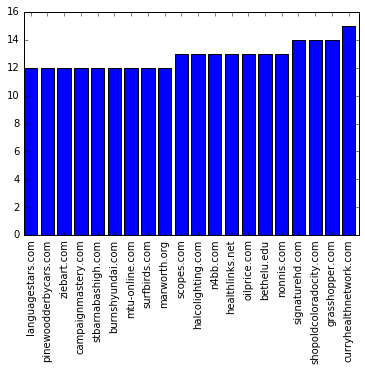

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

most_common_words = np.argsort(X.sum(axis=0))
ax = plt.subplot(111)
width=0.8
ax.bar(range(20),list(X.sum(axis=0)[0,most_common_words[0,-20:]].flat) , width=width)
ax.set_xticks(np.arange(20) + width/2)
ax.set_xticklabels(list(feature_names[most_common_words[0,-20:]].flat), rotation=90)
plot.show()

In [115]:
import sklearn.cluster as cluster
import sklearn as sk
data_norm  = sk.preprocessing.normalize(X,axis=1, norm='l2')


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [125]:
mykmeans = sk.cluster.KMeans(n_clusters=3).fit(data_norm)
l_kmeans = mykmeans.predict(data_norm)


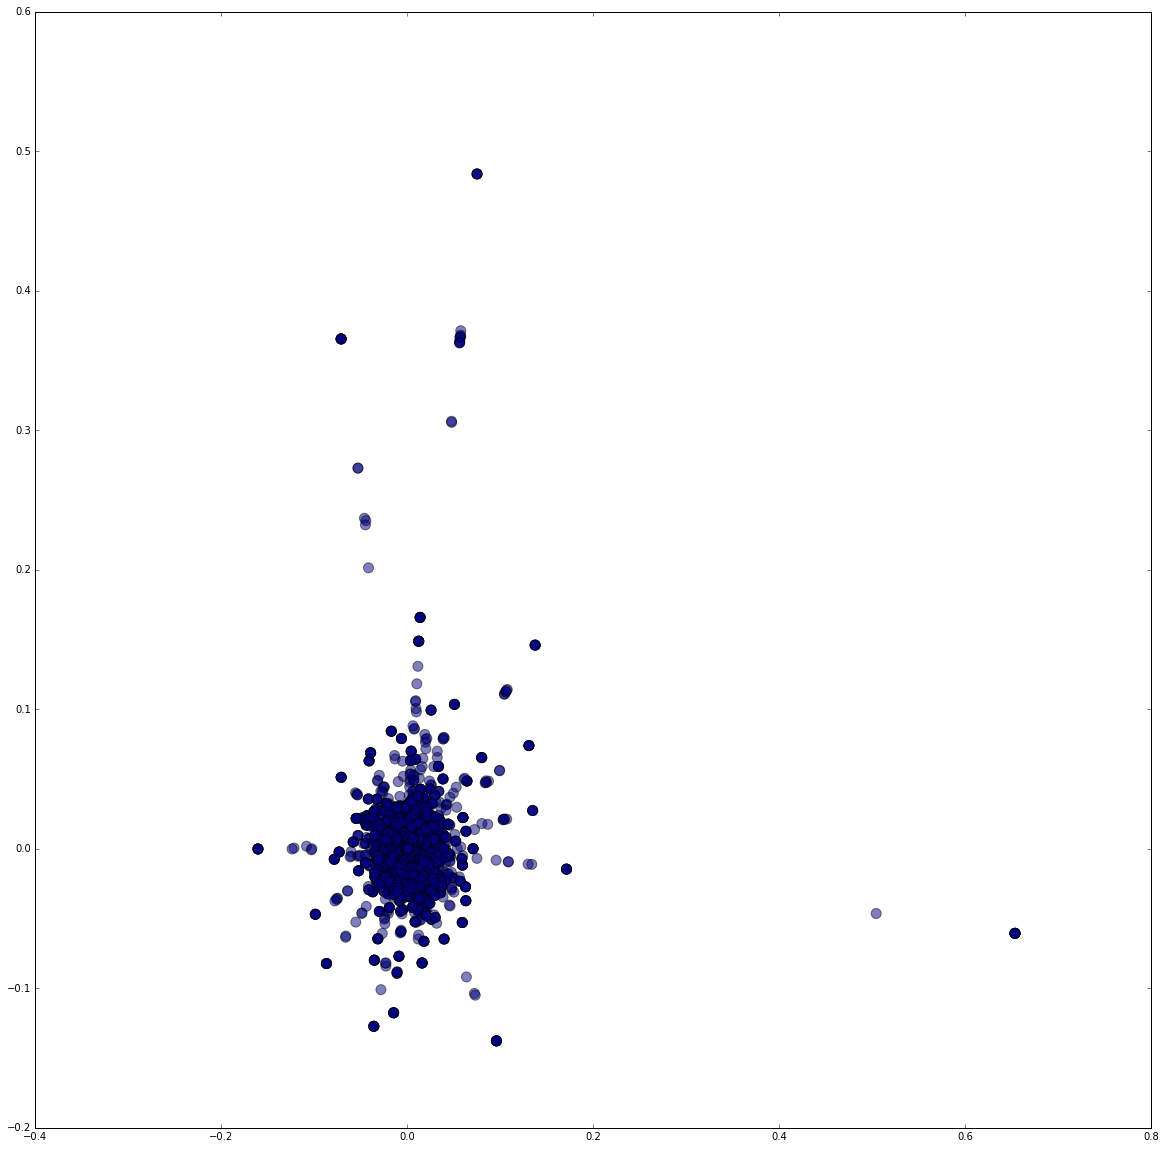

In [150]:
from __future__ import division
pca = sk.decomposition.TruncatedSVD(n_components = 3)
pca.fit(data_norm)
data_pca= pca.transform(data_norm)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.scatter(data_pca[0:,0],data_pca[0:,1],c = l_kmeans / (np.unique(l_kmeans).size-1),alpha=0.5,s= 100)


In [148]:
np.unique(color)

array([ 0.40000001,  0.49803922,  0.5       ,  0.59909266,  0.64633605,
        0.70385237,  0.78823531])

In [ ]:
from pyspark.sql.functions import explode
from pyspark.sql.functions import col

keys = (df2
    .select(explode("tldAggScores"))
    .select("key")
    .distinct()
    .rdd.flatMap(lambda x: x)
    .collect())

exprs = [col("tldAggScores").getItem(k).alias(k) for k in keys]
websites = df2.select(*exprs)


In [ ]:
from pyspark.mllib.linalg.distributed import CoordinateMatrix, MatrixEntry
mat = CoordinateMatrix(websites.rdd.map(lambda row: MatrixEntry(*row)))

In [ ]:
len(websites.schema)
mat
#colsums = websites.withColumn('total', sum(websites[col] for col in websites.columns))

In [ ]:
children = spark.sql("SELECT Subscriberid, child_in_hshld_count from table1") 
children.na.drop(subset=["child_in_hshld_count"]).count()

In [ ]:
sc = spark.sparkContext
from pyspark.mllib.linalg.distributed import CoordinateMatrix, MatrixEntry


In [ ]:
#websites.take(1).show()
CoordinateMatrix(websites.rdd).entries.toDF(['column','row' 'value'])